# Trajectory Completion Application for the KLT Paper

This notebook provides the figures for the Trajectory Completion application.

## Load the trajectory data, as usual

In [35]:
import numpy as np
import pickle 
from matplotlib import pyplot as plt 
trajectory_file = open("../spherical-code-paper/trajectories.pyo", "rb")
trajs = pickle.load(trajectory_file)
y_vec = np.array(trajs['y_vec'])
t_vec = np.array(trajs['t_vec'])
del trajs
trajectory_file.close()
del trajectory_file

Text(0, 0.5, 'Roadwise coordinate (ft)')

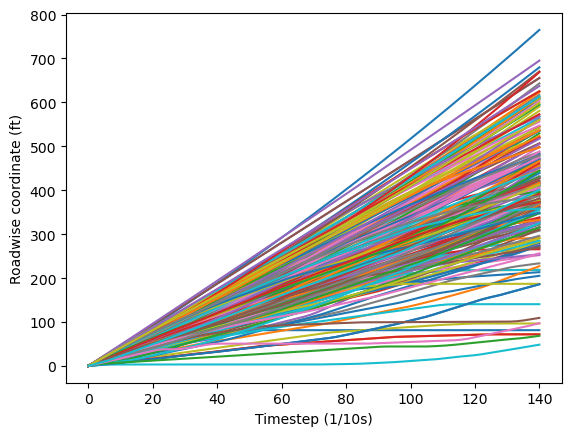

In [36]:
for traj in range(y_vec.shape[0]):
    plt.plot(y_vec[traj])
plt.xlabel('Timestep (1/10s)')
plt.ylabel('Roadwise coordinate (ft)')

# FPCA Decomposition

In [37]:
import skfda
fdgry = skfda.FDataGrid(y_vec, np.arange(y_vec.shape[1]))

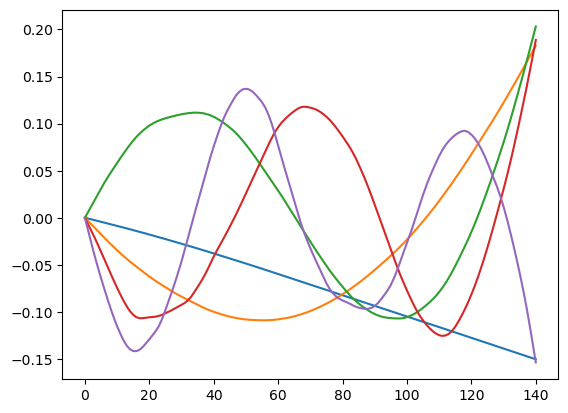

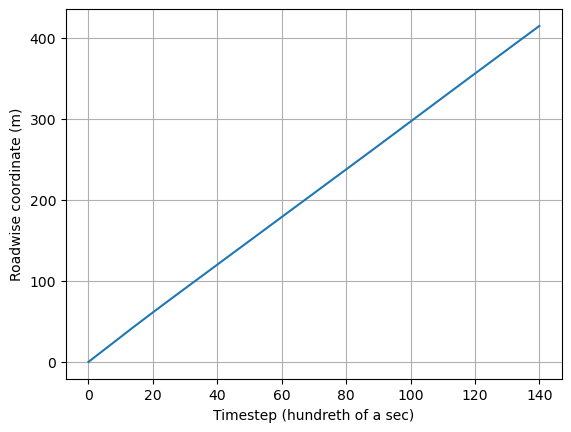

In [57]:
from skfda.preprocessing.dim_reduction.projection import FPCA

fpca_discretized_rw = FPCA(n_components=5)
fpca_discretized_rw.fit(fdgry)
fpca_discretized_rw.components_.plot()
fpca_discretized_rw.mean_.plot()
plt.xlabel('Timestep (hundreth of a sec)')
plt.ylabel('Roadwise coordinate (m)')
plt.grid(True)
print('')

In [39]:
# Get the FPCA scores for each trajectory
fpca_scores = fpca_discretized_rw.transform(fdgry)

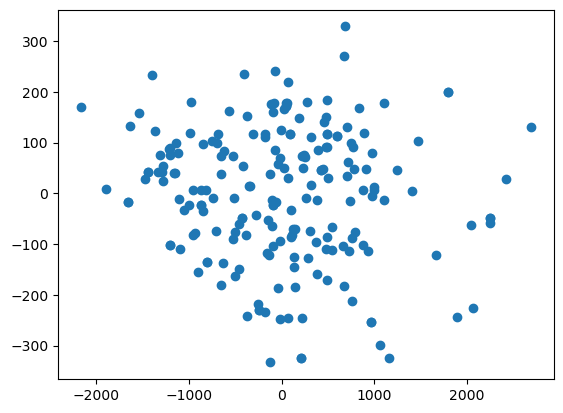

In [40]:
plt.scatter(fpca_scores[:,0], fpca_scores[:,1])

# Fitting of Gaussian distribution

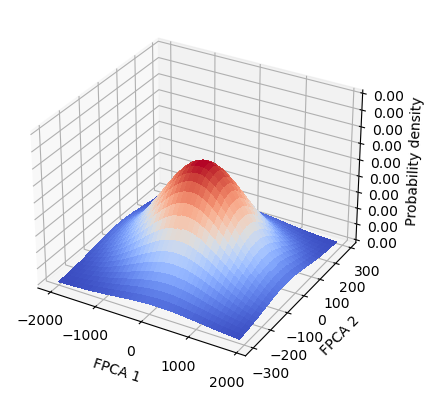

In [41]:
# fit a multivariate gaussian distribution to the scores
from scipy.stats import multivariate_normal
mu = np.mean(fpca_scores, axis=0)
cov = np.cov(fpca_scores.T)

mu2d = np.mean(fpca_scores[:,:2], axis=0)
cov2d = np.cov(fpca_scores[:,:2].T)

# Plot the scores and the fitted gaussian
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.gca(projection='3d')
# Make data.
X = np.arange(-2000, 2000, 100)
Y = np.arange(-300, 300, 10)
X, Y = np.meshgrid(X, Y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y
Z = multivariate_normal.pdf(pos, mean=mu2d, cov=cov2d)
# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                          linewidth=0, antialiased=False)
# Customize the z axis.
ax.set_zlim(0, 2e-6)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
ax.set_xlabel('FPCA 1')
ax.set_ylabel('FPCA 2')
ax.set_zlabel('Probability density')
# ax.set_title('FPCA scores of trajectories')
plt.show()


# Trajectory Completion

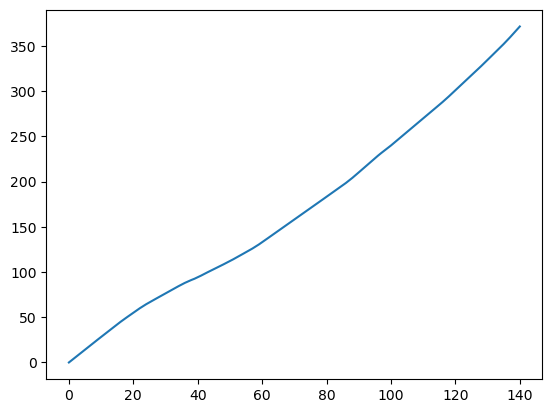

In [46]:
# sample trajectory 
sample_traj = y_vec[1]
plt.plot(sample_traj)

In [55]:
fpca_discretized_rw.components_.data_matrix.shape

(5, 141, 1)

In [56]:
# Now suppose the observed trajectory is the first 30 timesteps
# Initialization of the estimator
phi = fpca_discretized_rw.components_.data_matrix.copy()
sigma_prime = cov.copy()
mu_prime = cov.copy()

# Hyperparameters
sigma_x = 0.2 # measurement variance

for i in range(30):
    phi_i = phi[:,i,:].flatten()
    sigma_prime = np.linalg.inv(np.linalg.inv(sigma_prime) + 1/sigma_x * np.outer(phi_i, phi_i))
    mu_prime = mu_prime + 1/sigma_x * (-)

SyntaxError: unexpected EOF while parsing (2534813138.py, line 10)

In [49]:
mu_prime.shape

(5,)

In [50]:
sigma_prime.shape

(5, 5)